   # Data Analysis with Python

### House Sales in King County, USA
#### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                             |
|---------------|---------------------------------------------------------|
| id            | A notation for a house                                  |
| date          | Date the house was sold                                 |
| price         | Price (prediction target)                               |
| bedrooms      | Number of bedrooms in the house                         |
| bathrooms     | Number of bathrooms per bedroom                         |
| sqft_living   | Square footage of the home                              |
| sqft_lot      | Square footage of the lot                               |
| floors        | Total floors (levels) in the house                      |
| waterfront    | House with a view to a waterfront                       |
| view          | If the house has been viewed                            |
| condition     | Overall condition of the house                          |
| grade         | Overall grade given to the housing unit                 |
| sqft_above    | Square footage of the house apart from the basement     |
| sqft_basement | Square footage of the basement                          |
| yr_built      | Year the house was built                                |
| yr_renovated  | Year when the house was renovated                       |
| zipcode       | Zip code                                                |
| lat           | Latitude coordinate                                     |
| long          | Longitude coordinate                                    |
| sqft_living15 | Living room area in 2015 (implies some renovations)     |
| sqft_lot15    | Lot size area in 2015 (implies some renovations)        |


### Importing the libreries

In [1]:
!pip install seaborn
!pip install scikit-learn

### 1.0 Importing the Data

#### Load the csv:

(Aclaration: In my case I used the Excel Format)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### we use the method head to display the first 5 columns of the dataframe.

In [27]:
file_path = "C:/Excel Floors IBM Data Science.csv"

df = pd.read_csv(file_path, sep=";")

df.head()
        

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,475.112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,477.379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,475.208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,476.168,-122.045,1800,7503


### Question 1

Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [28]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.

In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.682909e+08,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,431.096689,-122.213896,1986.552492,12768.455652
std,2.876566e+09,8.516009e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,130.652407,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,473.849000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,475.524000,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,476.694000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,3.168750e+11,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,6210.000000,871200.000000


## 2.0 Data Wrangling

### Question 2

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True

In [30]:
df.drop("id", axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.682909e+08,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,431.096689,-122.213896,1986.552492,12768.455652
std,8.516009e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,130.652407,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,473.849000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,475.524000,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,476.694000,-122.125000,2360.000000,10083.000000
max,3.168750e+11,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000,6210.000000,871200.000000


Aclaration: since I couldn't make the code work with the "Unnamed" column, I checked and since there isn't any, I made a code for python to confirm it.

In [31]:
if 'Unnamed: 0' in df.columns:
    print("Column 'Unnamed: 0' Is present in the DataFrame.")
else:
    print("Column 'Unnamed: 0' Is not present in the DataFrame.")

Column 'Unnamed: 0' Is not present in the DataFrame.


we can see we have missing values for the columns  bedrooms and  bathrooms 

In [32]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Aclaration: as can be seen, python verifies that there are no missing data, I checked it manually in excel and they are not missing either.

### 3.0 Exploratory Data Analysis

#### Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe

In [33]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers .

<Axes: xlabel='waterfront', ylabel='price'>

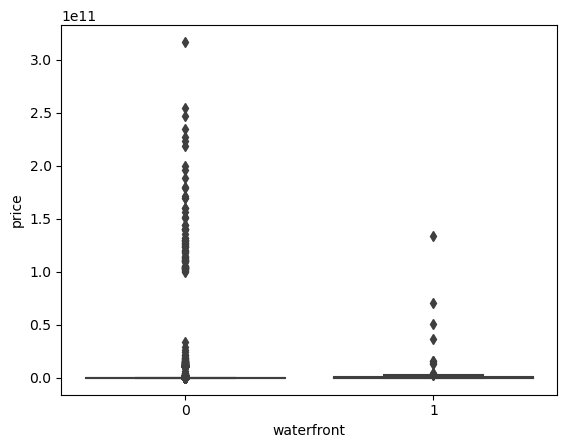

In [34]:
sns.boxplot(x='waterfront', y='price', data=df)

### Question 5
Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

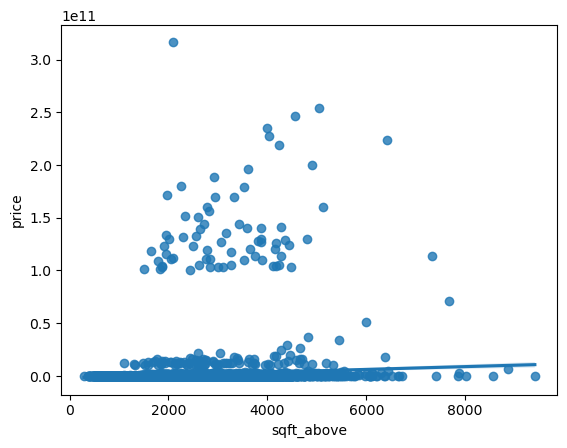

In [35]:
sns.regplot(x='sqft_above', y='price', data=df)

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [36]:
df.corr()['price'].sort_values()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_10340\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.017178
condition       -0.004378
long             0.001184
lat              0.001893
sqft_lot         0.006074
sqft_lot15       0.006802
waterfront       0.020533
yr_renovated     0.021708
yr_built         0.027682
floors           0.045449
sqft_basement    0.052879
bedrooms         0.062585
view             0.075705
bathrooms        0.111065
sqft_living15    0.127702
sqft_above       0.128484
grade            0.129777
sqft_living      0.141325
price            1.000000
Name: price, dtype: float64

### Module 4: Model Development
Import libraries

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

1.401748927043478e-06

### Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [39]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.019972890986154623

### Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [40]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [41]:
X = df[features]
Y= df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.02335488304053024

#### this will help with Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [42]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8
Use the list to create a pipeline object, predict the 'price', fit the object using the features in the list  features , then fit the model and calculate the R^2

In [43]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
pipe.score(X,Y)

-0.012765885248726017

## Module 5: MODEL EVALUATION AND REFINEMENT
import the necessary modules

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


we will split the data into training and testing set

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


### Question 9
Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [24]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.01804213093357332

### Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = Ridge(alpha=0.1)
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.0026221503721022277